In [3]:
#Import some packages to use
import cv2
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

#To see our directory
import os
import random
import gc   #Gabage collector for cleaning deleted data from memory

In [3]:
# 1.cv2，也称为 OpenCV，是一种可用于 Python 和许多其他高级编程语言的图像和视频处理库。它用于各种图像和视频分析，如面部识别和检测、
#   车牌识别、照片编辑、高级机器人视觉、光学字符识别等等。在本教程中，我们将使用它来读取和调整图像大小。
# 2.NumPy 是 Python 中最流行的数学库。有了这个库，大型、多维数组和矩阵的工作和计算变得简单快捷。它有大量的高级数学函数来操作这些数组。
# 3.Pandas 是一个为 Python 编程语言编写的软件库，用于数据处理和分析。值得一提的是，Panda 提供了用于操作数值表和时间序列的数据结构和操作。
# 4.Matplotlib 是 Python 的绘图库。可用于绘制线条、条形图、图形、直方图甚至显示图像。
# 5.%matplotlib inline 是一个命令，作用是使我们的图表出现在 Notebook 上。
# 6.os 是一个内置的 Python 包，用于访问你的计算机和文件系统。它可用于显示目录中的内容，创建新文件夹，甚至还可以删除文件夹。
# 7.random 可以帮助我们创建随机数，这些随机数将在我们拆分或者重新打乱数据集时使用。
# 8.gc 是垃圾回收器的简称，是手动清理和删除不必要变量的重要工具。我们将在 Kaggle 内核上积极使用它，因为我们正在处理图像数据集，因此分配
#   给我们的可用内存可能已经满了。

# test.zip 
# 这个文件包含了我们将在训练后要测试模型的图像，以了解模型是否已经学会区分猫和狗。

# train.zip

# 这个文件是我们模型的 “原材料”。它包含了我们要用来教会模型掌握狗或猫长什么样的数据。

In [4]:
# 這裡我們創建兩個變量train_dogs和train_cats。一個用於所有狗圖像，另一個用於貓圖像。
# list數據集共包含25,000個圖像，但由於我們正在嘗試使用小型數據集，因此我們將從這兩個類中僅提取2000個圖像。
# ** 2000隻狗圖像和2000隻貓圖像，製作4000張圖像的訓練數據集。
# 因此，我們從train_dogs和train_cats中獲取前2000個圖像，然後將它們連接成一個名為train_imgs的list。
# 很重要！ 
# 我們現在有train_imgs意味著train_dogs和train_cats變量沒用，佔用了不必要的空間。如果我們不刪除它們，當我們開始訓練模型時，
# 我們可能會耗盡內存。
train_dir = 'C:/Users/ASUS/train'
test_dir = 'C:/Users/ASUS/test'

train_dogs = ['C:/Users/ASUS/train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i]  #get dog images
train_cats = ['C:/Users/ASUS/train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]  #get cat images

test_imgs = ['C:/Users/ASUS/test/{}'.format(i) for i in os.listdir(test_dir)] #使用 os.listdir() 命令来获取训练数据 zip 文件中的所有图像，并在其名称中检索带有 dog 的所有图像。

train_imgs = train_dogs[:2000] + train_cats[:2000]  # slice the dataset and use 2000 in each class
random.shuffle(train_imgs)  # shuffle it randomly

del train_dogs
del train_cats
gc.collect()   #collect garbage to save memory

23

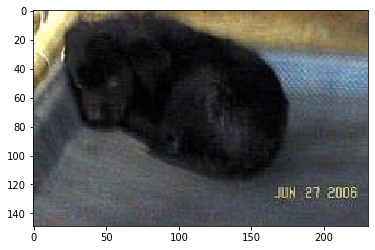

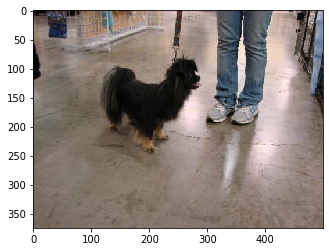

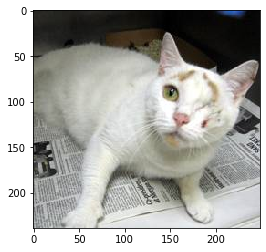

In [6]:
# 從matplotlib導入圖像繪圖模塊
# 運行for循環以在train_imgs中繪製前三個圖像
# 記住它的隨機列表，但幸運的是，當我運行代碼時，前三個圖像由兩隻狗和一隻貓組成，並註意到它們具有不同的尺寸。
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [7]:
# 將使用cv2模塊調整圖像大小。
# 首先讓我們聲明想要使用的新維度。使用150乘150高度和寬度以及3個通道。
# 彩色圖像由3個通道組成，即3個紅色，綠色和藍色像素值陣列。可以使用1個通道來讀取灰度格式（黑白）的圖像。
# 編寫一個小函數，讀取然後將圖像調整到上面所述的高度和寬度。
# 創建一個新的變量X，它將保存新的訓練集，y將保存我們的訓練標籤。（如果圖像是狗，則為1;如果是貓，則為0）
# 我們一個接一個地讀取我們的圖像並使用cv2命令調整它們的大小。
# 如果圖像是狗，我們追加1到y，如果是貓，則追加0。
# 現在，讓我們調用我們的函數並處理圖像。
# X，y = read_and_process_image（train_imgs）
# X現在是圖像像素值的數組，y是標籤列表。讓我們預覽X中的第一張圖片

#Lets declare our image dimensions
#we are using coloured images. 
nrows = 150
ncolumns = 150
channels = 3  #change to 1 if you want to use grayscale image


#A function to read and process the images to an acceptable format for our model
def read_and_process_image(list_of_images):
    """
    Returns two arrays: 
        X is an array of resized images
        y is an array of labels
    """
    X = [] # images
    y = [] # labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC))  #Read the image
        #get the labels
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    
    return X, y

In [8]:
X, y = read_and_process_image(train_imgs)
#X 现在是图像像素值数组的列表，y 是标签列表。让我们预览 X 中的第一张图片
X[0]

array([[[198, 249, 249],
        [156, 204, 211],
        [173, 218, 230],
        ...,
        [ 49,  80, 103],
        [ 68,  99, 124],
        [ 66, 100, 125]],

       [[199, 249, 252],
        [176, 223, 231],
        [157, 202, 215],
        ...,
        [ 58,  89, 112],
        [ 69, 100, 126],
        [ 68, 101, 127]],

       [[195, 247, 250],
        [166, 216, 225],
        [122, 167, 180],
        ...,
        [ 62,  92, 117],
        [ 64,  95, 120],
        [ 64,  95, 121]],

       ...,

       [[103, 104,  95],
        [108, 106, 100],
        [105, 101,  98],
        ...,
        [ 71,  68,  64],
        [ 72,  67,  67],
        [ 79,  72,  76]],

       [[100, 101,  92],
        [110, 108, 102],
        [105, 102,  99],
        ...,
        [ 71,  68,  64],
        [ 73,  67,  67],
        [ 79,  72,  76]],

       [[ 91,  93,  83],
        [104, 102,  96],
        [ 99,  96,  93],
        ...,
        [ 74,  71,  66],
        [ 76,  71,  71],
        [ 78,  71,  75]]

In [9]:
#怎么知道它是一条狗呢？让我们看一下标签列表 y 中的响应值
y

[1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,


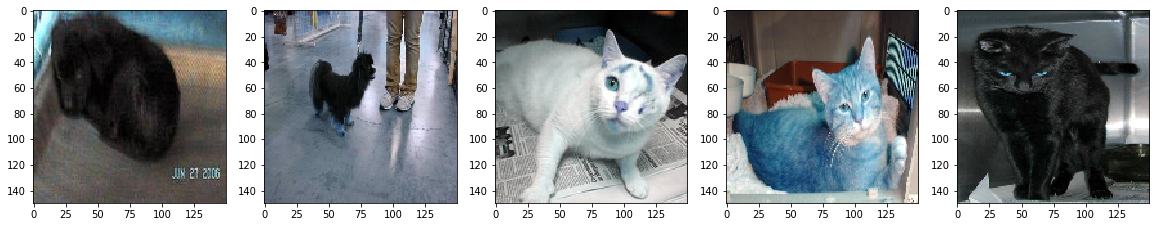

In [10]:
# 1和0分別代表狗和貓，繪製X的前5個數組，無法使用上面的matplotlib.image的mpimg模塊在X中繪製圖像，因為這些是像素數組而不是原始jpg文件。
# 所以應該使用imshow（）命令。
#Lets view some of the pics
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

Text(0.5, 1.0, 'Labels for Cats and Dogs')

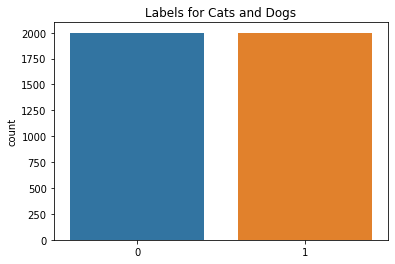

In [12]:
# 確信訓練集包含適當的狗和貓圖像，讓我們來看看我們的標籤。請記住，我們共有4000張圖片（2000隻狗和2000隻貓），因此我們的標籤列表y
# 應該包含2000個1和2000個0
# 導入了seaborn包，另一個在matplotlib之上構建的繪圖包，可以提供非常漂亮的圖。
# 請記住，我們是整潔的人，我們不等待垃圾人為我們做清潔。所以我們刪除了train_imgs，因為它已經被轉換為數組並保存在X中。
# X和y目前是類型列表（python數組的列表），我們將這些轉換為numpy數組，以便我們可以將它提供給我們的模型。
# 繪製彩色圖表以確認y標籤變量中的類數
import seaborn as sns
del train_imgs
gc.collect()

#Convert list to numpy array
X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two class
sns.countplot(y)
plt.title('Labels for Cats and Dogs')

In [13]:
#檢查數據的形狀。始終檢查並確認數據的形狀，這非常重要
print("Shape of train images is:", X.shape)
print("Shape of labels is:", y.shape)

Shape of train images is: (4000, 150, 150, 3)
Shape of labels is: (4000,)


In [15]:
#圖像是等級4的張量，或者我們可以說是尺寸為4000 x 150 x 150 x 3的4維陣列，它們分別對應於批量大小，高度，寬度和通道
# 構建的keras模型非常重要。該模型將（高度，寬度，通道）數組作為輸入
# 既然我們的數據準備就緒（X，y），我們就可以開始訓練，但首先我們必須做一些非常重要的事情，即將我們的數據分成訓練和驗證集。
# 對於拆分，我們將使用python中名為sklearn的流行機器學習包中的一個方便的函數
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train images is:", X_train.shape)
print("Shape of validation images is:", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of labels is:", y_val.shape)

Shape of train images is: (3200, 150, 150, 3)
Shape of validation images is: (800, 150, 150, 3)
Shape of labels is: (3200,)
Shape of labels is: (800,)


In [16]:
# 從sklearn 中導入 train_test_split。
# 我们告诉函数，希望将 20% 的数据分配给验证集，另外 80% 的数据分配给训练集
# 印出新的训练集和验证集的形状
del X
del y
gc.collect()

#get the length of the train and validation data
ntrain = len(X_train)
nval = len(X_val)

#We will use a batch size of 32. Note: batch size should be a factor of 2.***4,8,16,32,64...***
batch_size = 32

In [ ]:
# 導入keras 圖層模塊，其中包含深度學習中使用的不同類型的圖層，例如：
# **卷積層（主要用於計算機視覺）
# **池層（也用於計算機視覺）
# **循環層（主要用於順序層）和時間序列建模）
# **嵌入層（主要用於自然語言處理）
# **標準化層
# **等等
# 在這裡我們導入包含兩種類型的keras 模型：
# **我們將在本教程中使用的順序模型和
# **使用Functional API的模型
# 這裡我們導入keras 優化器，這是一個包含不同類型的反向傳播算法的模塊，用於訓練我們的模型。其中一些優化器是：
# ** sgd（隨機梯度下降）
# ** rmsprop（均方根傳播）
# ** Adams 
# ** Adagrad 
# ** Adadelta
# 導入一個在處理小數據集時使用的最重要的函數（ImageDataGenerator）
# 現在讓我們創建我們的網絡架構 我們將遵循一個名為VGGnet的流行，有效和簡單的架構

![title](1.jpg)

In [26]:
# 網絡架構就是我們安排卷積層的方式
# 使用一個小的vggnet，但你可以看到我們的過濾器大小隨著我們向下層而增加。
# 32→64→128→512 - 最後一層為1
# 這裡我們創建一個順序模型。這告訴keras按順序堆疊所有層。
# 在這裡，我們通過調用我們創建的模型上的.add（）函數來創建第一層，並傳遞我們想要的圖層類型 - 一個Conv2D圖層。第一層稱為輸入層，並且我們需要設置一些重要參數。
# ** 濾波器大小 [ 32 ]：這是輸出維度的大小（即卷積中輸出濾波器的數量）
# ** kernel_size [3,3]：這指定了2D卷積窗口的高度和寬度。
# ** activation [' relu ']：我們選擇一個叫做非線性的激活函數，供我們的神經網絡使用。R eLU（整流線性單元）是目前使用的最常見的激活功能，其他變化是洩漏的 R eLU和eLU 。
# **輸入形狀[150,150,3]：還記得我們調整圖像尺寸的尺寸嗎？150乘150對嗎？我們在這里傳遞包括3的通道。
# 我們沒有傳遞4000的第一個維度，因為這是批量維度。
# 這裡我們添加一個MaxPool2D圖層。其功能是減小輸入特徵的空間大小，因此有助於減少網絡中的參數和計算量，從而有助於減少過度擬合。
# 當我們的模型記憶訓練數據時，會發生過度擬合。該模型在訓練時表現出色，但在測試時失敗。
# 這裡我們添加一個Flatten圖層。conv2D圖層提取並學習空間特徵，然後在平坦化之後將其傳遞到密集層。這是展平層的工作。
# 在這裡，我們添加一個值為0.5的Dropout圖層。輟學隨機丟棄神經網絡中的一些層，然後用減少的網絡學習。這樣，網絡在單個層上學習獨立且不可靠。底線是它有助於過度擬合。
# 0.5表示隨機掉落一半的層。
# 最後一層的輸出大小為1，另一個激活函數稱為sigmoid。這是因為我們試圖檢測圖像是狗還是貓。即我們希望模型輸出圖像是狗而不是貓的概率，這意味著我們需要概率分數，其中較高的值意味著分類器認為圖像是狗，較低的值意味著它是貓。
# sigmoid是完美的，因為它接受一組數字並返回0到1範圍內的概率分佈。
# 我們可以通過調用模型對像上的keras函數.summary （）來預覽我們的convnet的排列和參數大小。
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))  #Dropout for regularization
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  #Sigmoid function at the end because we have just two classes

In [27]:
#Lets see our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [28]:
# 我們將三個參數傳遞給model.compile（）命令
# Loss ['binary_crossentropy']：我們指定一個優化器將最小化的損失函數。在這種情況下，由於我們正在處理兩類問題，我們使用二進制的交叉熵損失。
# 還記得我們之前定義的優化器嗎？我們將使用其中一個稱為rmsprop。這不是一個固定的選擇，它是一個稱為超參數調整的過程的一部分，它可能是世界級模型
# 和天真模型之間的差異。
# 在這裡，我們指定在訓練後測量模型性能時要使用的度量標準。我們想知道我們的模型是否表現良好。
# 由於我們正在進行分類問題，因此準確度指標（acc）是一個不錯的選擇。
# 注意：用於衡量模型性能的指標取決於您正在處理的問題類型。
# 最後，在我們開始訓練模型之前，我們需要執行一些規範化。即，將我們的圖像像素值縮放為單位標準差，平均值為0。
# 我們將在keras中使用一個名為ImageDataGenerator的重要模塊，當我們在訓練期間將圖像輸入模型時，它會執行一些重要的功能。
# 但是......但什麼是ImageDataGenerator？
# 據keras的創始人弗朗索瓦CHOLLET，Keras ImageDataGenerator（）讓我們快速建立Python生成器，可以自動把圖像文件轉換成可以trainng期間被直接送入模型預處理張量。它可以輕鬆地為我們執行以下功能：
# 1。將JPEG內容解碼為RGB網格像素。
# 2.將這些轉換為浮點張量。
# 3.將像素值（0到255之間）重新調整為[0,1]間隔（神經網絡在標準化數據時表現更好）。
# 4.幫助我們輕鬆增強圖像。（因為我們正在訓練一個小數據集，所以我們將使用一個重要的特性）。
# 讓我們創建我們的ImageDataGenerator對象。我們將創建兩個生成器，一個用於訓練集，另一個用於我們的驗證集。
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#We'll use binary_crossentropy loss because its a binary classification
sgd = optimizers.SGD(lr=0.01, decay=1e-4, momentum=0.9, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['acc'])
#model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [29]:
#Lets create the augmentation configuration
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255,   #Scale the image between 0 and 1
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)  #We do not augment validation data. we only perform rescale

In [25]:
# 我們將rescale選項傳遞給ImageDataGenerator對象。在重新調整= 1/255的選擇是一個很重要的參數。它將圖像像素值標準化為零均值和標準差為1.
# 它可以幫助您的模型有效地學習和更新其參數。
# 第二組選項是圖像增強選項。它們告訴ImageDataGenerator隨機應用一些轉換到Image。這將有助於擴充我們的數據集並改進泛化。
# 在這裡，我們還為驗證集創建了一個ImageDataGenerator對象。注意：我們不在此處進行數據擴充。我們只執行重新縮放。
#Create the image generators
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
val_generator = val_datagen.flow(X_val, y_val, batch_size=batch_size)

In [31]:
#The training part
#We train for 64 epochs with about 100 steps per epoch
history =model.fit_generator(train_generator,
                              steps_per_epoch=ntrain // batch_size,
                              epochs=64,
                              validation_data=val_generator,
                              validation_steps=nval // batch_size)

Epoch 1/64
100/100 [==============================] - 84s 837ms/step - loss: 0.6922 - acc: 0.5178 - val_loss: 0.6819 - val_acc: 0.5125
Epoch 2/64
100/100 [==============================] - 78s 782ms/step - loss: 0.6835 - acc: 0.5509 - val_loss: 0.6761 - val_acc: 0.5337
Epoch 3/64
100/100 [==============================] - 78s 784ms/step - loss: 0.6752 - acc: 0.5784 - val_loss: 0.6498 - val_acc: 0.6188
Epoch 4/64
100/100 [==============================] - 78s 778ms/step - loss: 0.6681 - acc: 0.5741 - val_loss: 0.6554 - val_acc: 0.6088
Epoch 5/64
100/100 [==============================] - 78s 779ms/step - loss: 0.6566 - acc: 0.5953 - val_loss: 0.6545 - val_acc: 0.6400
Epoch 6/64
100/100 [==============================] - 78s 784ms/step - loss: 0.6568 - acc: 0.5903 - val_loss: 0.6353 - val_acc: 0.6525
Epoch 7/64
100/100 [==============================] - 78s 785ms/step - loss: 0.6535 - acc: 0.6103 - val_loss: 0.6251 - val_acc: 0.6600
Epoch 8/64
100/100 [==============================] - 8

100/100 [==============================] - 79s 788ms/step - loss: 0.4202 - acc: 0.8003 - val_loss: 0.3553 - val_acc: 0.8650
Epoch 62/64
100/100 [==============================] - 79s 790ms/step - loss: 0.3967 - acc: 0.8194 - val_loss: 0.3574 - val_acc: 0.8488
Epoch 63/64
100/100 [==============================] - 79s 791ms/step - loss: 0.3918 - acc: 0.8253 - val_loss: 0.3459 - val_acc: 0.8612
Epoch 64/64
100/100 [==============================] - 79s 787ms/step - loss: 0.3903 - acc: 0.8181 - val_loss: 0.3672 - val_acc: 0.8425


In [32]:
# 保存我們的模型，使用下面顯示的簡單Keras功能，這樣我們可以隨時重複使用它，而不是在重新運行我們的筆記本時再次訓練。
# #Save the model
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

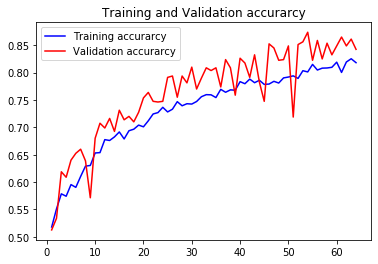

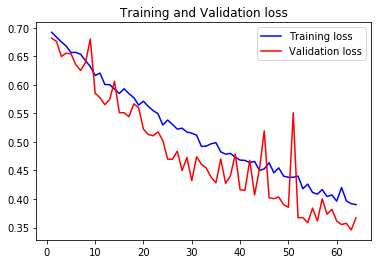

In [33]:
#lets plot the train and val curve
#get the details form the history object
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

plt.show()

In [34]:
#Now lets predict on the first 10 Images of the test set
X_test, y_test = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty.
x = np.array(X_test)
test_datagen = ImageDataGenerator(rescale=1./255)

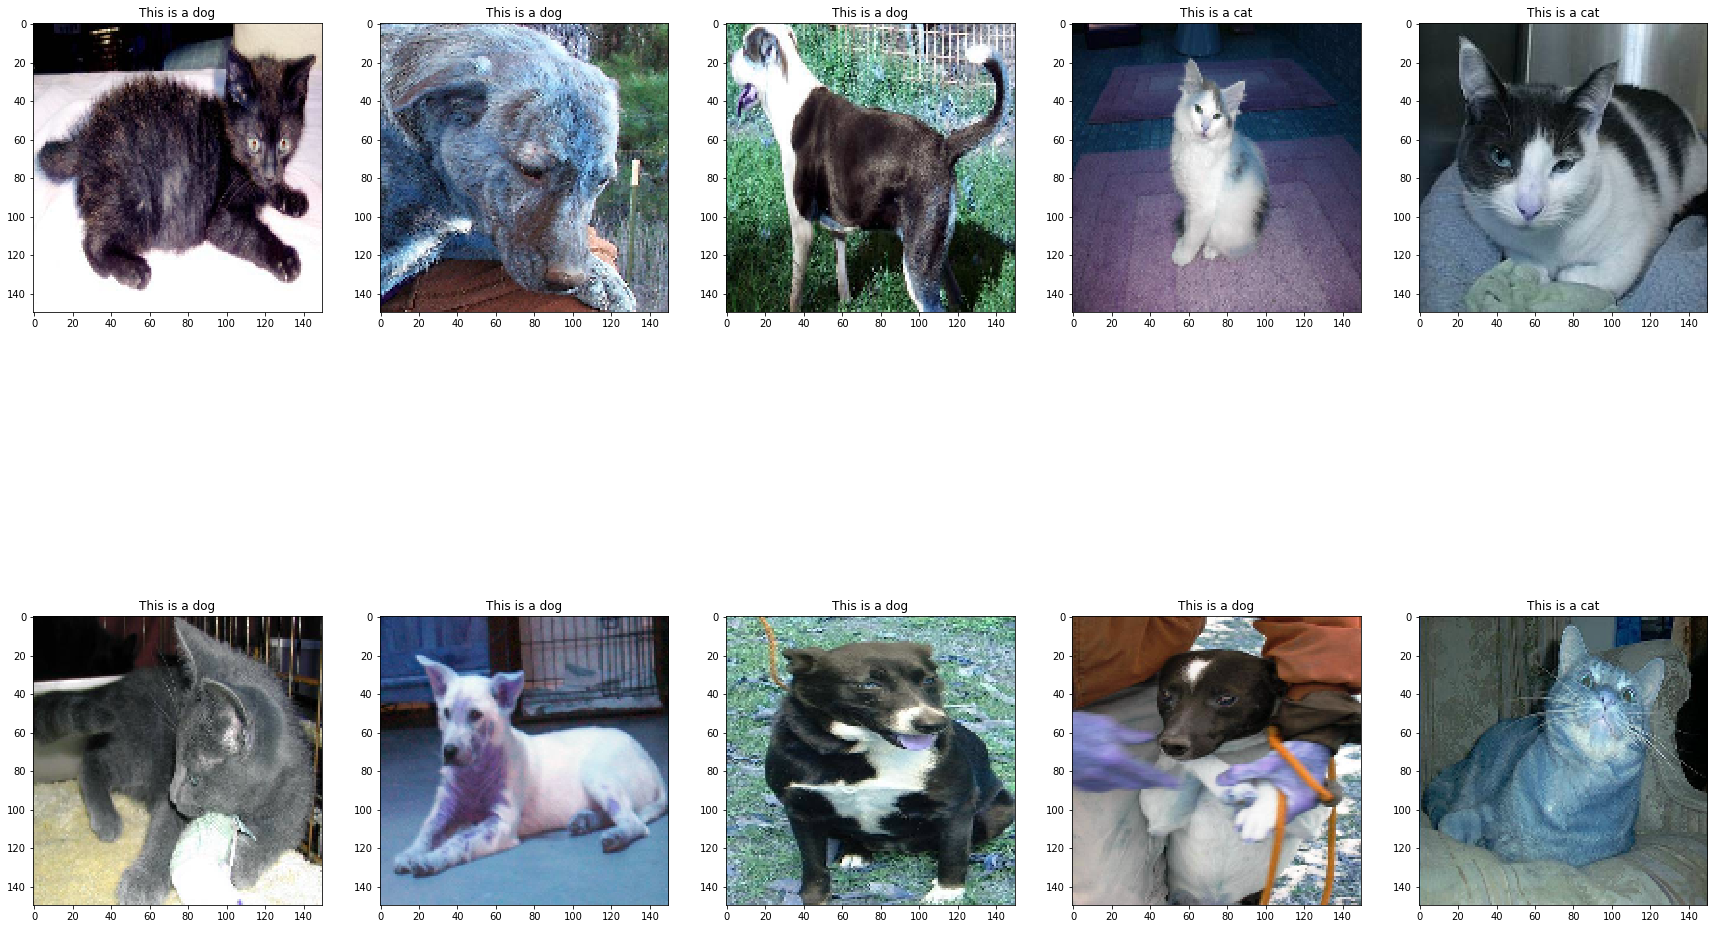

In [35]:
# 創建一個列表來保存我們要生成的標籤。
# 我們設置了我們要繪製的圖像的圖形大小。
# 在這裡，我們通過在我們訓練的模型上調用.predict（）方法，對ImageDataGenerator提供的特定圖像進行預測。
# 該PRED變量的模型是如何肯定的是，當前圖像是狗的概率。
# 由於我們給狗標籤為1，概率很高 - 至少大於平均值0.5 - 意味著我們的模型非常有信心圖像是狗，否則它是貓。
# 因此，我們只需創建一個if -else語句，如果概率大於0.5 ，則附加字符串' Dog '，否則它會將' cat ' 附加到text_label。
# 我們這樣做是為了在繪製圖像時為圖像添加標題。
# 在這裡我們添加一個子圖，以便我們可以繪製多個圖像。
# 在這裡，我們將預測的類添加為圖像圖的標題。

i = 0
text_labels = []
plt.figure(figsize=(30,20))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.title('This is a ' + text_labels[i])
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 10 == 0:
        break
plt.show()